In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  #data visulization
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#import datasets
train = pd.read_csv('../input/tabular-playground-series-may-2021/train.csv')
test = pd.read_csv('../input/tabular-playground-series-may-2021/test.csv')

/kaggle/input/tabular-playground-series-may-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2021/train.csv
/kaggle/input/tabular-playground-series-may-2021/test.csv


In [74]:
train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


In [75]:
print(train.shape)
print(test.shape)

(100000, 52)
(50000, 51)


<AxesSubplot:>

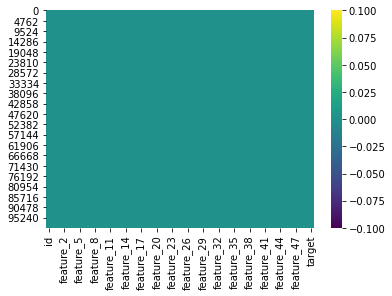

In [76]:
#checking null values
sns.heatmap(train.isnull(),cmap='viridis')

<AxesSubplot:>

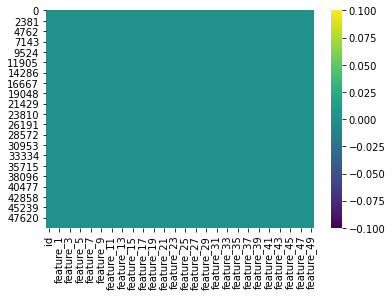

In [77]:
sns.heatmap(test.isnull(),cmap='viridis')

In [78]:
train['target'].unique()

array(['Class_2', 'Class_1', 'Class_4', 'Class_3'], dtype=object)

In [79]:
X = train.drop(['id','target'],axis=1)
y = train['target']

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [81]:
y

array([1, 0, 0, ..., 2, 1, 2])

In [82]:
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,1,0,1,0,0,0,0,0,...,3,0,0,21,0,0,0,0,0,0
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,1,0,0,0,0,13,2,0
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,1,0,0,0,2,0,0,...,1,0,0,6,0,0,3,0,0,0
99996,0,0,0,0,0,0,0,1,2,0,...,0,0,2,0,0,0,10,0,0,0
99997,0,0,0,0,0,1,0,0,0,4,...,0,0,0,0,0,1,0,0,2,0
99998,0,0,0,0,1,0,0,0,0,5,...,0,0,0,0,0,0,1,0,4,0


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [101]:
print(X_train.shape)
print(X_test.shape)

(75000, 50)
(25000, 50)


# KNN Classifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))
print('\n')

print(f'Accuracy: {accuracy_score(y_test,knn_pred)*100:.2f}%')

[[ 169 1234  417  327]
 [1226 8028 2908 2159]
 [ 465 3010 1112  794]
 [ 239 1754  620  538]]


              precision    recall  f1-score   support

           0       0.08      0.08      0.08      2147
           1       0.57      0.56      0.57     14321
           2       0.22      0.21      0.21      5381
           3       0.14      0.17      0.15      3151

    accuracy                           0.39     25000
   macro avg       0.25      0.25      0.25     25000
weighted avg       0.40      0.39      0.40     25000



Accuracy: 39.39%


In [86]:
#to find the k value, finding the error each time the model predicts between k value 1 to 100
error = []

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error')

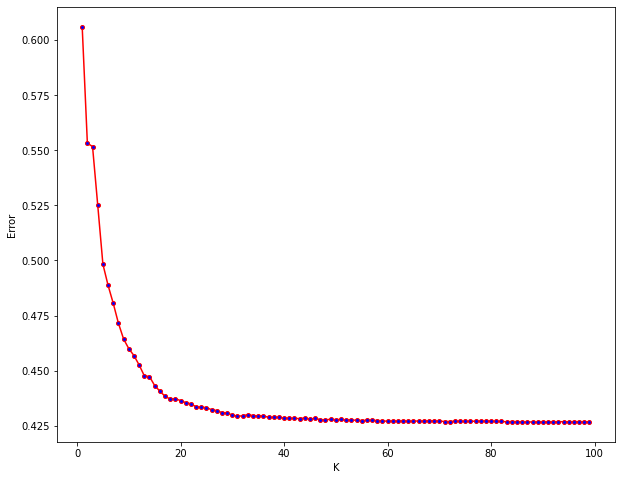

In [94]:
plt.figure(figsize=(10,8))
plt.plot(range(1,100),error,color='red',marker='o',markerfacecolor='blue',markersize=4)
plt.xlabel('K')
plt.ylabel('Error')


In [90]:
#choosing k value = 70
knn = KNeighborsClassifier(n_neighbors=80)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
                            

[[    0  2143     3     1]
 [    0 14302    17     2]
 [    0  5361    18     2]
 [    0  3145     4     2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2147
           1       0.57      1.00      0.73     14321
           2       0.43      0.00      0.01      5381
           3       0.29      0.00      0.00      3151

    accuracy                           0.57     25000
   macro avg       0.32      0.25      0.18     25000
weighted avg       0.46      0.57      0.42     25000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
print(f'Accuracy: {accuracy_score(y_test,knn_pred)*100:.2f}%')

Accuracy: 57.29%


# GridSearchCV - KNN

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
#model training with whole train data set
param_grid = {'n_neighbors':list(range(85,100))} 
grid = GridSearchCV(KNeighborsClassifier(n_neighbors=30),param_grid,refit=True,verbose=2)
grid.fit(X,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .....................................n_neighbors=85; total time=  39.9s
[CV] END .....................................n_neighbors=85; total time=  39.5s
[CV] END .....................................n_neighbors=85; total time=  39.6s
[CV] END .....................................n_neighbors=85; total time=  39.8s
[CV] END .....................................n_neighbors=85; total time=  34.4s
[CV] END .....................................n_neighbors=86; total time=  38.0s
[CV] END .....................................n_neighbors=86; total time=  37.8s
[CV] END .....................................n_neighbors=86; total time=  38.4s
[CV] END .....................................n_neighbors=86; total time=  38.5s
[CV] END .....................................n_neighbors=86; total time=  34.3s
[CV] END .....................................n_neighbors=87; total time=  39.1s
[CV] END .....................................n_

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
                                         95, 96, 97, 98, 99]},
             verbose=2)

In [95]:
print(grid.best_score_)
print(grid.best_estimator_)

0.5751999999999999
KNeighborsClassifier(n_neighbors=88)


In [96]:
prediction = grid.predict_proba(test.drop('id',axis=1))

In [97]:
prediction

array([[0.07954545, 0.64772727, 0.09090909, 0.18181818],
       [0.09090909, 0.59090909, 0.18181818, 0.13636364],
       [0.10227273, 0.57954545, 0.18181818, 0.13636364],
       ...,
       [0.09090909, 0.52272727, 0.25      , 0.13636364],
       [0.125     , 0.54545455, 0.15909091, 0.17045455],
       [0.09090909, 0.625     , 0.17045455, 0.11363636]])

# Gradient Boosting Classifier

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.1)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [111]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
                            

[[    1  2126    20     0]
 [    4 14265    47     5]
 [    2  5269   110     0]
 [    0  3133    18     0]]
              precision    recall  f1-score   support

           0       0.14      0.00      0.00      2147
           1       0.58      1.00      0.73     14321
           2       0.56      0.02      0.04      5381
           3       0.00      0.00      0.00      3151

    accuracy                           0.58     25000
   macro avg       0.32      0.25      0.19     25000
weighted avg       0.46      0.58      0.43     25000

0.57504


In [112]:
gb.fit(X,y)
prediction = gb.predict_proba(test.drop('id',axis=1))

In [113]:
prediction

array([[0.08670566, 0.61710127, 0.17489065, 0.12130242],
       [0.07772371, 0.62499629, 0.19267207, 0.10460793],
       [0.09613758, 0.61995869, 0.18799609, 0.09590764],
       ...,
       [0.0900188 , 0.51824255, 0.21934033, 0.17239832],
       [0.09035281, 0.57453723, 0.18447651, 0.15063344],
       [0.08815708, 0.567671  , 0.19978133, 0.14439059]])

# Submission

In [114]:
submission = pd.DataFrame({'id':test['id'],'Class_1': prediction[:,0:1].flatten(),'Class_2':prediction[:,1:2].flatten(),
                           'Class_3':prediction[:,2:3].flatten(),'Class_4':prediction[:,3:].flatten()})
submission.to_csv(f'submission.csv',index=False)

In [115]:
submission

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.086706,0.617101,0.174891,0.121302
1,100001,0.077724,0.624996,0.192672,0.104608
2,100002,0.096138,0.619959,0.187996,0.095908
3,100003,0.095288,0.552875,0.244891,0.106946
4,100004,0.076297,0.604649,0.208248,0.110806
...,...,...,...,...,...
49995,149995,0.078528,0.703374,0.151533,0.066564
49996,149996,0.080963,0.636485,0.149465,0.133088
49997,149997,0.090019,0.518243,0.219340,0.172398
49998,149998,0.090353,0.574537,0.184477,0.150633
